# Single Neuron

In [42]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.widgets import Slider
np.set_printoptions(precision=3, legacy='1.25')

## Linear Regression

Values based on Professor Bryce's "Deep Learning" lecture 04 on Gradient Descent

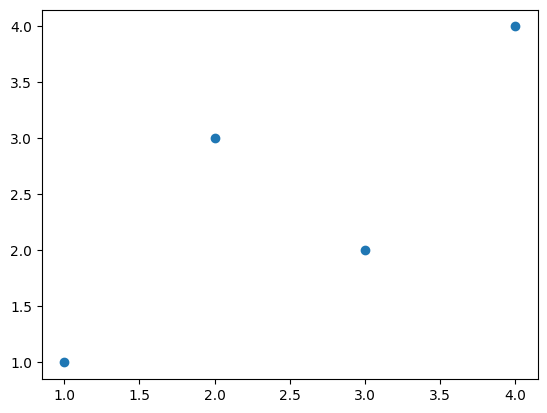

In [61]:
# Generate a random dataset with 1000 points (x, y):
NUM_POINTS: int = 4
dataset = np.array([[1, 1], [2, 3], [3, 2], [4, 4]])
x, y = dataset[:, 0], dataset[:, 1]
plt.scatter(x, y) #c=np.random.rand(NUM_POINTS, 3), alpha=0.5)
plt.show()

In [ ]:
class LinearNeuron:
    def __init__(self, lr: float, w: float, b: float, epochs: int = 5) -> None:
        self.lr: float = lr
        self.w: float = w
        self.b: float = b
        self.epochs: int = epochs

    def forward(self, x: float) -> float:
        return self.w * x + self.b

    def loss(self, y: float, y_hat: float) -> float:
        return sum((y - y_hat)**2)

    def gradient(self, y: float, y_hat: float, x: float) -> float:
        return (sum(e := -2 * (y - y_hat)), sum(e*x))

    def train(self, x: float, y: float) -> None:
        print(f"Initial: w = {self.w}, b = {self.b}")
        for e in range(self.epochs):
            
            # Compute the predicted output given current parameters
            y_hat = self.forward(x)

            # Compute the loss between the predicted and actual output
            loss = self.loss(y, y_hat)

            # Update the parameters using gradient descent
            gradient = self.gradient(y, y_hat, x)
            self.w -= self.lr * gradient[1]
            self.b -= self.lr * gradient[0]

            # Print information about the epoch
            print(f"Epoch {e+1}: Loss = {loss:.3f}, w = {self.w:.3f}, b = {self.b:.3f}")
        return loss

Initial: w = 10, b = -10
Epoch 1: Loss = 1050.000, w = 6.580, b = -11.000
Epoch 2: Loss = 203.652, w = 5.412, b = -11.236
Epoch 3: Loss = 108.322, w = 4.992, b = -11.220
Epoch 4: Loss = 95.810, w = 4.821, b = -11.120
Epoch 5: Loss = 92.472, w = 4.732, b = -10.995
Epoch 6: Loss = 90.192, w = 4.672, b = -10.862
Epoch 7: Loss = 88.075, w = 4.621, b = -10.727
Epoch 8: Loss = 86.019, w = 4.574, b = -10.593
Epoch 9: Loss = 84.014, w = 4.528, b = -10.461
Epoch 10: Loss = 82.057, w = 4.483, b = -10.329


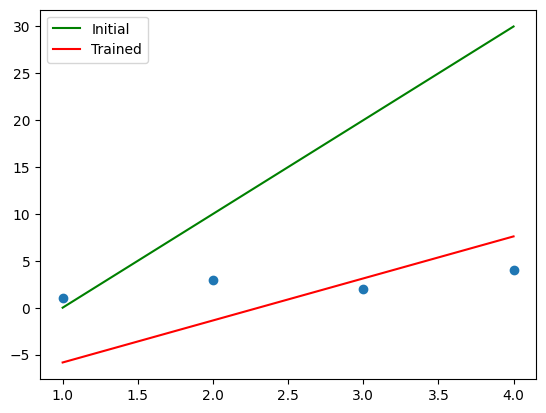

In [67]:
w, b = 10, -10
N = LinearNeuron(lr=0.01, w=w, b=b, epochs=10)
N.train(x, y)

plt.scatter(x, y)
plt.plot(x, w*x + b, c='green', label='Initial')
plt.plot(x, N.forward(x), c='red', label='Trained')
plt.legend()
plt.show()

## Logistic Regression (Classification)